In [1]:
import numpy
from matplotlib import pyplot
import matplotlib as mpl
import sys
sys.path.append('../src/')
import densities

In [2]:
mpl.rcParams['font.size'] = 12
#mpl.rcParams['text.usetex'] = True

In [44]:
R_mu = 100
R_sigma = 4
R = R_mu * R_sigma
mu_range = numpy.linspace(0,10, R_mu)
sigma_range = numpy.linspace(1,10, R_sigma)
MU, SIGMA = numpy.meshgrid(mu_range, sigma_range)
mu_mesh = MU.T.flatten()
sigma_mesh = SIGMA.T.flatten()
mu_phi = numpy.zeros((R,1))
mu_phi[:,0] = mu_mesh
sigma_phi = numpy.ones((R,1,1))
sigma_phi[:,0,0] = sigma_mesh 
phi = densities.GaussianDensity(sigma_phi, mu_phi)

In [45]:
sigma_range

array([ 1.,  4.,  7., 10.])

$-\ln (\sigma^2 + \cosh(h))$

In [46]:
sigma2 = 1.
f = lambda h: -numpy.log(sigma2 + 2*numpy.cosh(h))
g = lambda omega: 2 * numpy.sinh(omega) / (numpy.sqrt(omega ** 2) * (sigma2 + 2 * numpy.cosh(omega)))
k = lambda h, omega: numpy.log(sigma2 + 2 * numpy.cosh(omega)) + .5 * g(omega) * (h ** 2 - omega ** 2)
omega_dagger = numpy.sqrt(phi.integrate('xx'))
f_lb = -k(omega_dagger, omega_dagger).reshape((R_mu, R_sigma))
f_sample = numpy.mean(f(phi.sample(100000)), axis=0).reshape((R_mu, R_sigma))

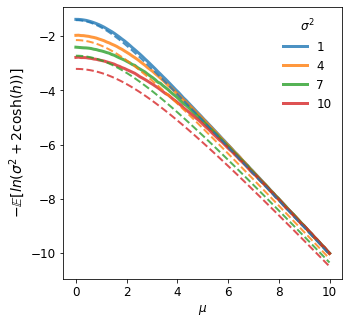

In [52]:
pyplot.figure(figsize=(5,5))
for r in range(R_sigma):
    pyplot.plot(mu_range, f_sample[:,r], 'C%d' %r, alpha=.8, label='%d' % sigma_range[r], lw=3)
    pyplot.plot(mu_range, f_lb[:,r], 'C%d--' %r, alpha=.8, lw=2, zorder=9)
pyplot.xlabel('$\mu$')
pyplot.ylabel('$- \mathbb{E}[ ln(\sigma^2 + 2\cosh(h))]$', size=14)
pyplot.legend(title='$\sigma^2$', frameon=False)

(100, 4)

In [49]:
mu_range.shape

(100,)